<center><h1>Quantum Signatures for Secure Encryption</h1></center>
<center>Brian Otieno¹</center>

### Affiliations
 1.  [Nairobi Quantum Hub ](https://www.linkedin.com/company/nairobi-quantum-hub) 

## Abstract
Quantum signatures offer a novel approach to secure encryption by leveraging quantum mechanics and complex geometric structures. The proposed algorithm operates within a Cartesian plane ranging from -1 billion to 1 billion, where a drawable canvas serves as the foundation for creating a unique digital signature. The user draws their signature on this plane, and from the resulting path, a set of random numbers is generated.

## Mathematical Formulation for Quantum Signatures
The algorithm for quantum signatures involves several key mathematical components, particularly in the generation and transformation of the private and public keys. The following sections outline the necessary mathematical formulations, including those for gate rotations.

### 1. Private Key Extraction

Given a signature path on a Cartesian plane $(x_i, y_i)$ for $i = 1, 2, \ldots, N$, where $N$ is the number of points in the signature:

#### Random Number Generation:

- Extract 10,000 random points $(x_{pi}, y_{pi})$ from the signature path.
- The private key $K_{\text{private}}$ is represented as a vector:

$$
K_{\text{private}} = \{(x_{p1}, y_{p1}), (x_{p2}, y_{p2}), \ldots, (x_{p10000}, y_{p10000})\}
$$

### 2. Public Key Extraction

- Extract 100 random points $(x_{qi}, y_{qi})$ from the signature path, similar to the private key but smaller in number:

$$
K_{\text{public}} = \{(x_{q1}, y_{q1}), (x_{q2}, y_{q2}), \ldots, (x_{q100}, y_{q100})\}
$$

### 3. Quantum Superposition and Gate Rotations

#### Quantum State Representation:

- The private key can be encoded into a quantum state $|\psi_{\text{private}}\rangle$ in a Hilbert space. Each point $(x_{pi}, y_{pi})$ corresponds to a qubit state:


$$
|\psi_{\text{private}}\rangle = \bigotimes_{k=1}^{10000} (\alpha_k |0\rangle + \beta_k |1\rangle)
$$

- Here, $\alpha_k$ and $\beta_k$ are complex coefficients derived from the $x_{pk}$ and $y_{pk}$ values, with normalization $|\alpha_k|^2 + |\beta_k|^2 = 1$.

#### Superposition:

- The private key state is placed into superposition:

$$
|\psi_{\text{superposition}}\rangle = \frac{1}{\sqrt{2}} \left( |\psi_{\text{private}}\rangle + |\psi_{\text{transformed}}\rangle \right)
$$

- The state $|\psi_{\text{transformed}}\rangle$ represents the quantum state after applying transformations.


### 4. Quantum Gate Rotations

#### Rotation Gate

- Apply a rotation gate $R_{\theta}$ to each qubit, where $\theta$ is determined by the corresponding $(x_{p_k}, y_{p_k})$ values:
  $$
  R_{\theta} = \begin{pmatrix}
  \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
  \sin\frac{\theta}{2} & \cos\frac{\theta}{2}
  \end{pmatrix}
  $$
- The angle $\theta_k$  for each qubit is given by:
  $$
  \theta_k = \arctan\left(\frac{y_{p_k}}{x_{p_k}}\right)
  $$

#### Hadamard Gate

- Optionally, a Hadamard gate \(H\) can be applied to create an equal superposition:
  $$
  H = \frac{1}{\sqrt{2}} \begin{pmatrix}
  1 & 1 \\
  1 & -1
  \end{pmatrix}
  $$

### 5. Decryption Condition

#### Comparison

- The quantum state $|\psi_{\text{transformed}}\rangle$ resulting from gate operations is measured, and the measured outcomes $K_{\text{measured}}$ are compared with the public key $K_{\text{public}}$.
- Decryption is successful if:
  $$
  K_{\text{public}} \subseteq K_{\text{measured}}
  $$
- Mathematically, this implies:
  $$
  \text{Decrypt} = \begin{cases}
  1, & \text{if } K_{\text{public}} \subseteq K_{\text{measured}} \\
  0, & \text{otherwise}
  \end{cases}
  $$

In [1]:
# Import libraries
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Simulator setup
simulator = AerSimulator()

In [3]:
# Constants
NUM_PRIVATE_POINTS = 10000
NUM_PUBLIC_POINTS = 100
NUM_QUBITS = NUM_PRIVATE_POINTS

In [4]:
# Simulate the drawing of a signature as a path in a 2D space
np.random.seed(42)  # For reproducibility
x_coords = np.random.uniform(-1e9, 1e9, NUM_PRIVATE_POINTS)
y_coords = np.random.uniform(-1e9, 1e9, NUM_PRIVATE_POINTS)

In [5]:
# Extract the private and public keys from the signature path
private_key = list(zip(x_coords, y_coords))
public_key_indices = np.random.choice(range(NUM_PRIVATE_POINTS), NUM_PUBLIC_POINTS, replace=False)
public_key = [private_key[i] for i in public_key_indices]

In [6]:
# Initialize a quantum circuit with qubits corresponding to the private key
qc = QuantumCircuit(NUM_QUBITS)

In [7]:
# Apply Hadamard gate to create superposition state
qc.h(range(NUM_QUBITS))

In [8]:
# Apply rotation gates to qubits based on (x, y) coordinates (signature path)
for i in range(NUM_QUBITS):
    theta = np.arctan2(y_coords[i], x_coords[i])
    qc.ry(theta, i)

In [9]:
# Create a new circuit for the first 5 qubits. 
sub_qc = QuantumCircuit(5)

In [10]:
# Copy the relevant operations from the original circuit to the new one
for instr, qargs, cargs in qc.data:
    qubit_indices = [qc.qubits.index(qbit) for qbit in qargs]
    if all(index < 5 for index in qubit_indices):
        sub_qc.append(instr, [sub_qc.qubits[index] for index in qubit_indices], cargs)

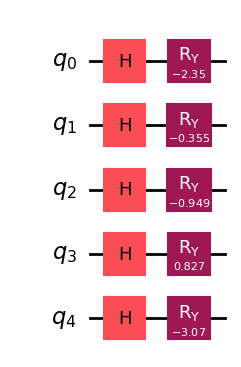

In [11]:
# Visualize the subsetted qubits
sub_qc.draw('mpl')
plt.show()

In [12]:
# Simulate the statevector (without measurement)
statevector = Statevector.from_instruction(sub_qc) 

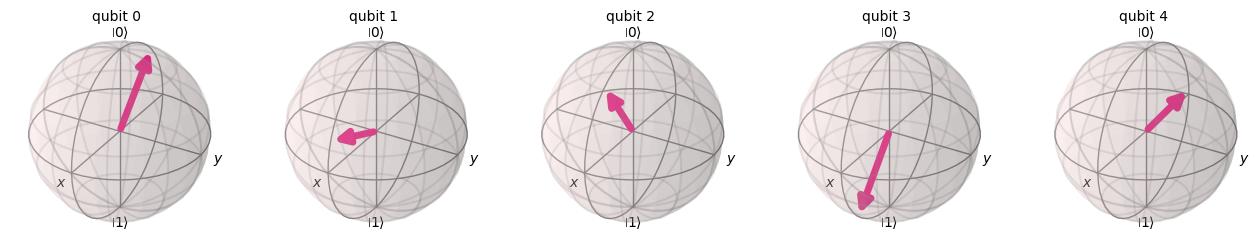

In [13]:
# Visualize the resulting state on a Bloch sphere
plot_bloch_multivector(statevector)
plt.show()

In [14]:
# Measure the quantum state
sub_qc.measure_all() # change sub_qc to qc when number of qubits advances

In [15]:
# Execute the circuit on the simulator
compiled_circuit = transpile(sub_qc, simulator) # we should ideally be using qc but circuit will be too wide for coupling map
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

In [16]:
# Get the result
counts = result.get_counts(sub_qc) # use qc when qubit advances to accommodate the large qubit numbers

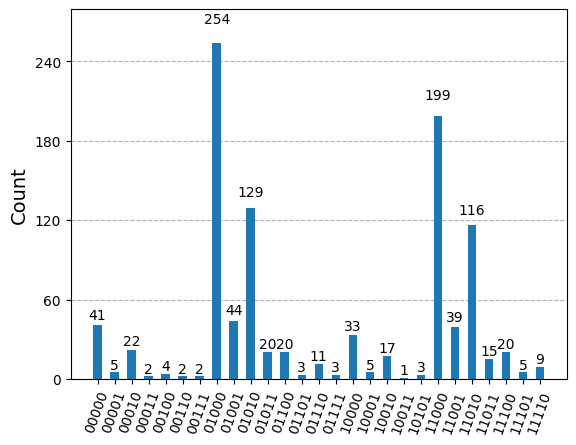

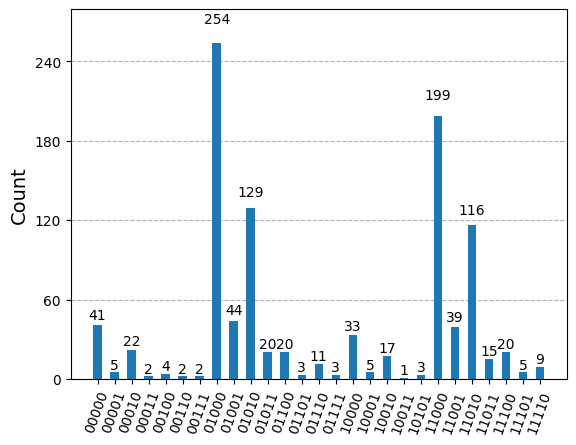

In [17]:
# Visualize the measurement results as a histogram
plot_histogram(counts)

Decryption Check

In [ ]:
# Function to check if public key falls within private key's transformed path
def decrypt(private_key, public_key, measured_state):
    # Convert state vector to binary indices
    binary_indices = [format(i, f'0{NUM_QUBITS}b') for i in range(2**NUM_QUBITS)]
    
    # Check if public key elements match the measured states
    for public_point in public_key:
        idx = private_key.index(public_point)
        if measured_state[binary_indices[idx]] < 0.5:  # Threshold for match
            return False
    return True